# 🚗 Car Price Prediction — Simple Linear Regression

This project uses a simple linear regression model to predict car prices based on **engine size**, using the `CarPrice_Assignment.csv` dataset.

---
### 🔍 Objective:
- Predict `price` using `enginesize`
- Evaluate performance on unseen data using a train/test split

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import statsmodels.api as stats

### Load Dataset

In [29]:
carprice_df = pd.read_csv('CarPrice_Assignment.csv')
carprice_df.shape  # (205, 26)
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
carprice_df[['enginesize', 'price']].corr()

,enginesize,price
enginesize,1.000000,0.874145
price,0.874145,1.000000


### Train/Test Split

We’ll use 70% of the data to train the model and reserve the remaining 30% for testing its performance. This is done by randomly sampling the dataset using the .sample() method with the frac parameter set to 0.7. The test set is then created by dropping these sampled rows from the original dataset.

In [31]:
train_df = carprice_df.sample(frac=0.7, random_state=99)  # 70% train
test_df = carprice_df.drop(train_df.index)  # 30% test

In [24]:
train_df.shape

(144, 26)

In [25]:
test_df.shape

(61, 26)

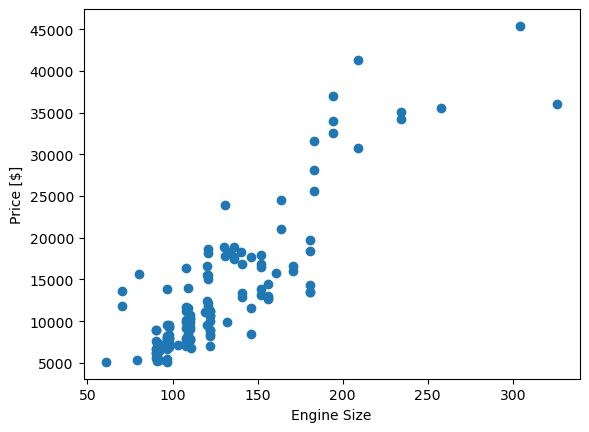

In [26]:
plot.scatter(train_df.enginesize, train_df.price)
plot.xlabel('Engine Size')
plot.ylabel('Price [$]')
plot.show()

### Fitting The Linear Regression Model


In [42]:
# Define target and feature
X_train = train_df['enginesize']
Y_train = train_df['price']

In [44]:
# Add constant term
X_train_const = stats.add_constant(X_train)

In [45]:
# Fit OLS model
model_carprice = stats.OLS(Y_train, X_train_const)
results_carprice = model_carprice.fit()

In [46]:
print(results_carprice.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     431.6
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           6.87e-45
Time:                        00:05:05   Log-Likelihood:                -1399.1
No. Observations:                 144   AIC:                             2802.
Df Residuals:                     142   BIC:                             2808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7969.4448   1068.536     -7.458      0.0

In [47]:
# Extract model parameters
intercept_carprice = results_carprice.params.iloc[0]
engsize_coeff = results_carprice.params.iloc[1]
ssr_carprice = results_carprice.ssr


In [48]:
# Display model metrics
print('The intercept value is {:.3f}'.format(intercept_carprice))
print('The coefficient (slope) for the engine size variable is {:.3f}'.format(engsize_coeff))
print('The sum of squared residuals (SSR) is {:.1f}'.format(ssr_carprice))


The intercept value is -7969.445
The coefficient (slope) for the engine size variable is 167.600
The sum of squared residuals (SSR) is 2319259109.3


### Plotting Result

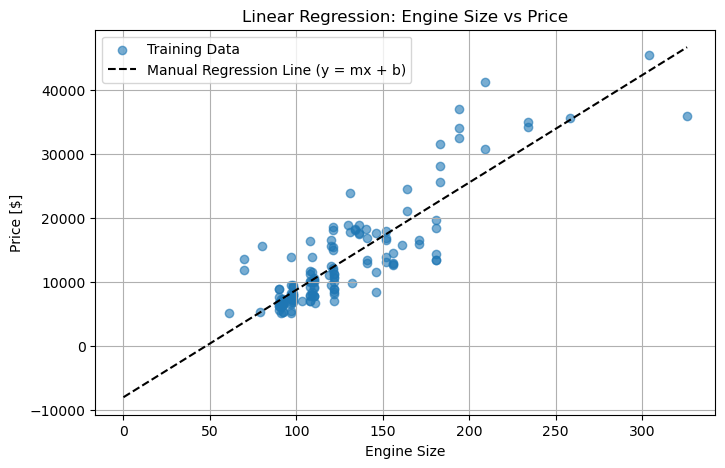

In [49]:
x_synthetic = np.linspace(0, X_train.max(), 50)
y_pred_carprice = engsize_coeff * x_synthetic + intercept_carprice

plot.figure(figsize=(8, 5))
plot.scatter(X_train, Y_train, alpha=0.6, label='Training Data')
plot.plot(x_synthetic, y_pred_carprice, color='black', linestyle='--', label='Manual Regression Line (y = mx + b)')
plot.xlabel('Engine Size')
plot.ylabel('Price [$]')
plot.title('Linear Regression: Engine Size vs Price')
plot.legend()
plot.grid(True)
plot.show()

### 📈 Model Evaluation and Transition
The current model explains a fair portion of the variation in car prices using only engine size. However, there’s still unexplained variance in our predictions.

### Applying the Model to Unseen Data

In [50]:
Y_test = test_df['price']
X_test = stats.add_constant(test_df['enginesize'])

In [51]:
# Generate predictions
test_predictions = results_carprice.predict(X_test)

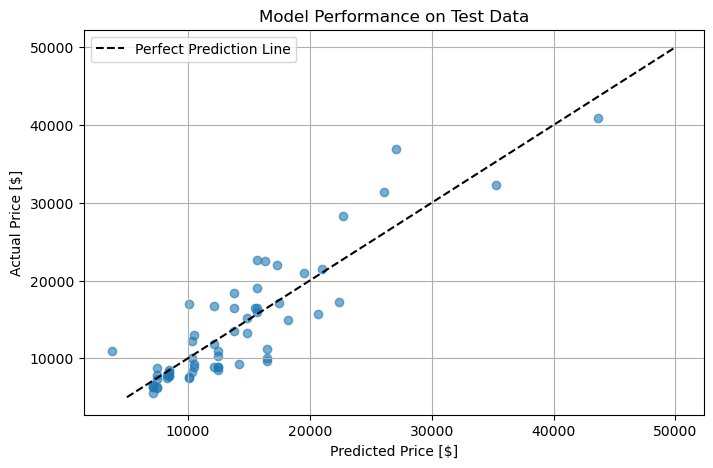

In [52]:
# --- ✅ Step 4: Visualize Predicted vs Actual Prices ---
plot.figure(figsize=(8, 5))
plot.scatter(test_predictions, Y_test, alpha=0.6)
plot.plot([5000, 50000], [5000, 50000], color='black', linestyle='--', label='Perfect Prediction Line')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Actual Price [$]')
plot.title('Model Performance on Test Data')
plot.legend()
plot.grid(True)
plot.show()

###  Model Evaluation on Test Set

We applied our regression model to the test set to evaluate how well it performs on unseen data. The scatterplot compares the **predicted prices** against the **actual prices**. Points closer to the dashed diagonal line indicate stronger prediction accuracy. The results show that the model performs reasonably well, although there’s some variation — suggesting room for improvement with more features.